In [2]:
        #****************************Useful Resouces****************************************
#https://builtin.com/data-science/correlation-matrix
#https://www.atlassian.com/data/charts/heatmap-complete-guide
#https://statisticsbyjim.com/hypothesis-testing/bootstrapping/
#https://www.jwilber.me/permutationtest/
#https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/
#https://diamondage.com/what-does-it-mean-to-fit-a-model-anyway/
#https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples
#https://youtu.be/-7U10N8PvlQ?si=z80VKLG8urCU-OeA#R2 explained in 5 minutes
#https://www.youtube.com/watch?v=X1MRbEnEq2s#Random forest regressor explained in 8 minutes
#understanding elbow method to calculate k in k-Means clustering
#https://builtin.com/data-science/elbow-method#:~:text=The%20elbow%20method%20is%20a%20graphical%20method%20for%20finding%20the,the%20graph%20forms%20an%20elbow.
#Mean Squared Error#
#https://youtu.be/beIgcdf0YDE
#K-Means clustering
#https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
#Githubfiles for AI LinkedIn Course#
#https://github.com/LinkedInLearning/artificial-intelligence-foundations-machine-learning-3067770

In [61]:
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import missingno as msno

np.set_printoptions(suppress=True)

## Data Preparation

### Reading a csv file

In [6]:
#Use index_col to indicate you have an index column in the input csv. This can happen when the input file id an exported dataframe.
data=pd.read_csv('Advertising.csv',index_col=0)

###   Finding the min and max of a single column dataframe

In [8]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
X=data[['TV']]

In [10]:
#This works even in dataframes with multiple columns. The output of .min() and .max() functions are of data type series. 
#Elements in a series needs to be accessed by series.iloc[index]
X.min() 

TV    0.7
dtype: float64

In [11]:
x_min=X.min().iloc[0]

In [12]:
x_max=X.max().iloc[0]

###   Creating a dataframe

In [14]:
X_new = pd.DataFrame({'TV': [x_min,x_max]})

In [15]:
X_new

,TV
0,0.7
1,296.4


###  Plotting a scatter plot - basic

<Axes: xlabel='TV', ylabel='sales'>

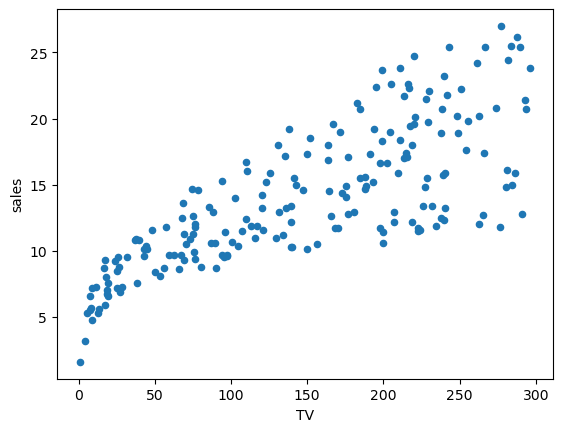

In [17]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')



### Creating a new dataframe from an existing dataframe with only a few columns

In [19]:
testcaHousing_df = pd.read_csv("housing.csv")

In [20]:
testcaHousing_df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [21]:
testcaHousing_df_selectcolumns = testcaHousing_df[['longitude', 'latitude']]

In [22]:
testcaHousing_df_selectcolumns

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


### Reading and preparing data

In [25]:
caHousing = pd.read_csv("housing.csv")

In [27]:
# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object
def collist(df):
    mylist =[]
    for i in df.columns: 
        if df[i].dtype != 'object':
           mylist.append(i)
    return mylist

columns_list = collist(caHousing)

In [29]:
#Find the type of a data element in Python
type(columns_list)

list

In [31]:
#Find the shape of a dataframe
caHousing.shape

(20640, 10)

In [28]:
#Find the schema of a dataframe
caHousing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [29]:
#Find unique values in the column of a dataframe
uniqueval = caHousing['ocean_proximity'].unique()

In [132]:
#To find the unique values in a column
caHousing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [30]:
#Find the count of unique values
caHousing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [31]:
caHousing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [130]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile 
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
caHousing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [118]:
# Verify which features have missing values
total_missing=caHousing.isnull().sum().sort_values(ascending=False)

In [98]:
caHousing.isnull().count()

In [95]:
caHousing.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [124]:
# Calculate the % of missing values in the entire dataset
#caHousing.isnull() creates a dataframe with actual values replaced with true or false. 
#caHousing.isnull().sum() works like a normal sum function on the dataframe. Since isnull = True translates to 1, it actually sums up all the null values. 
#caHousing.isnull().count() works like a count function on a dataframe. It sums up both the true and false values. Main point to note is that the result you 
#get using caHousing.isnull().count() which is the count of all true and false is different from caHousing.count() which sums up only the non-null values
#Always use caHousing.isnull().count() in % calculations. It is however counter intuitive.
percent_missing=(caHousing.isnull().sum()/caHousing.isnull().count()*100).sort_values(ascending=False)

In [128]:
#Create a dataframe that displays missing values among columns
pd.concat([total_missing,percent_missing], axis=1, keys = ['total_missing','percent_missing'])

,total_missing,percent_missing
total_bedrooms,207,1.002907
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [35]:
# Another way to calculate % of missing data
caHousing.isnull().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

<Axes: >

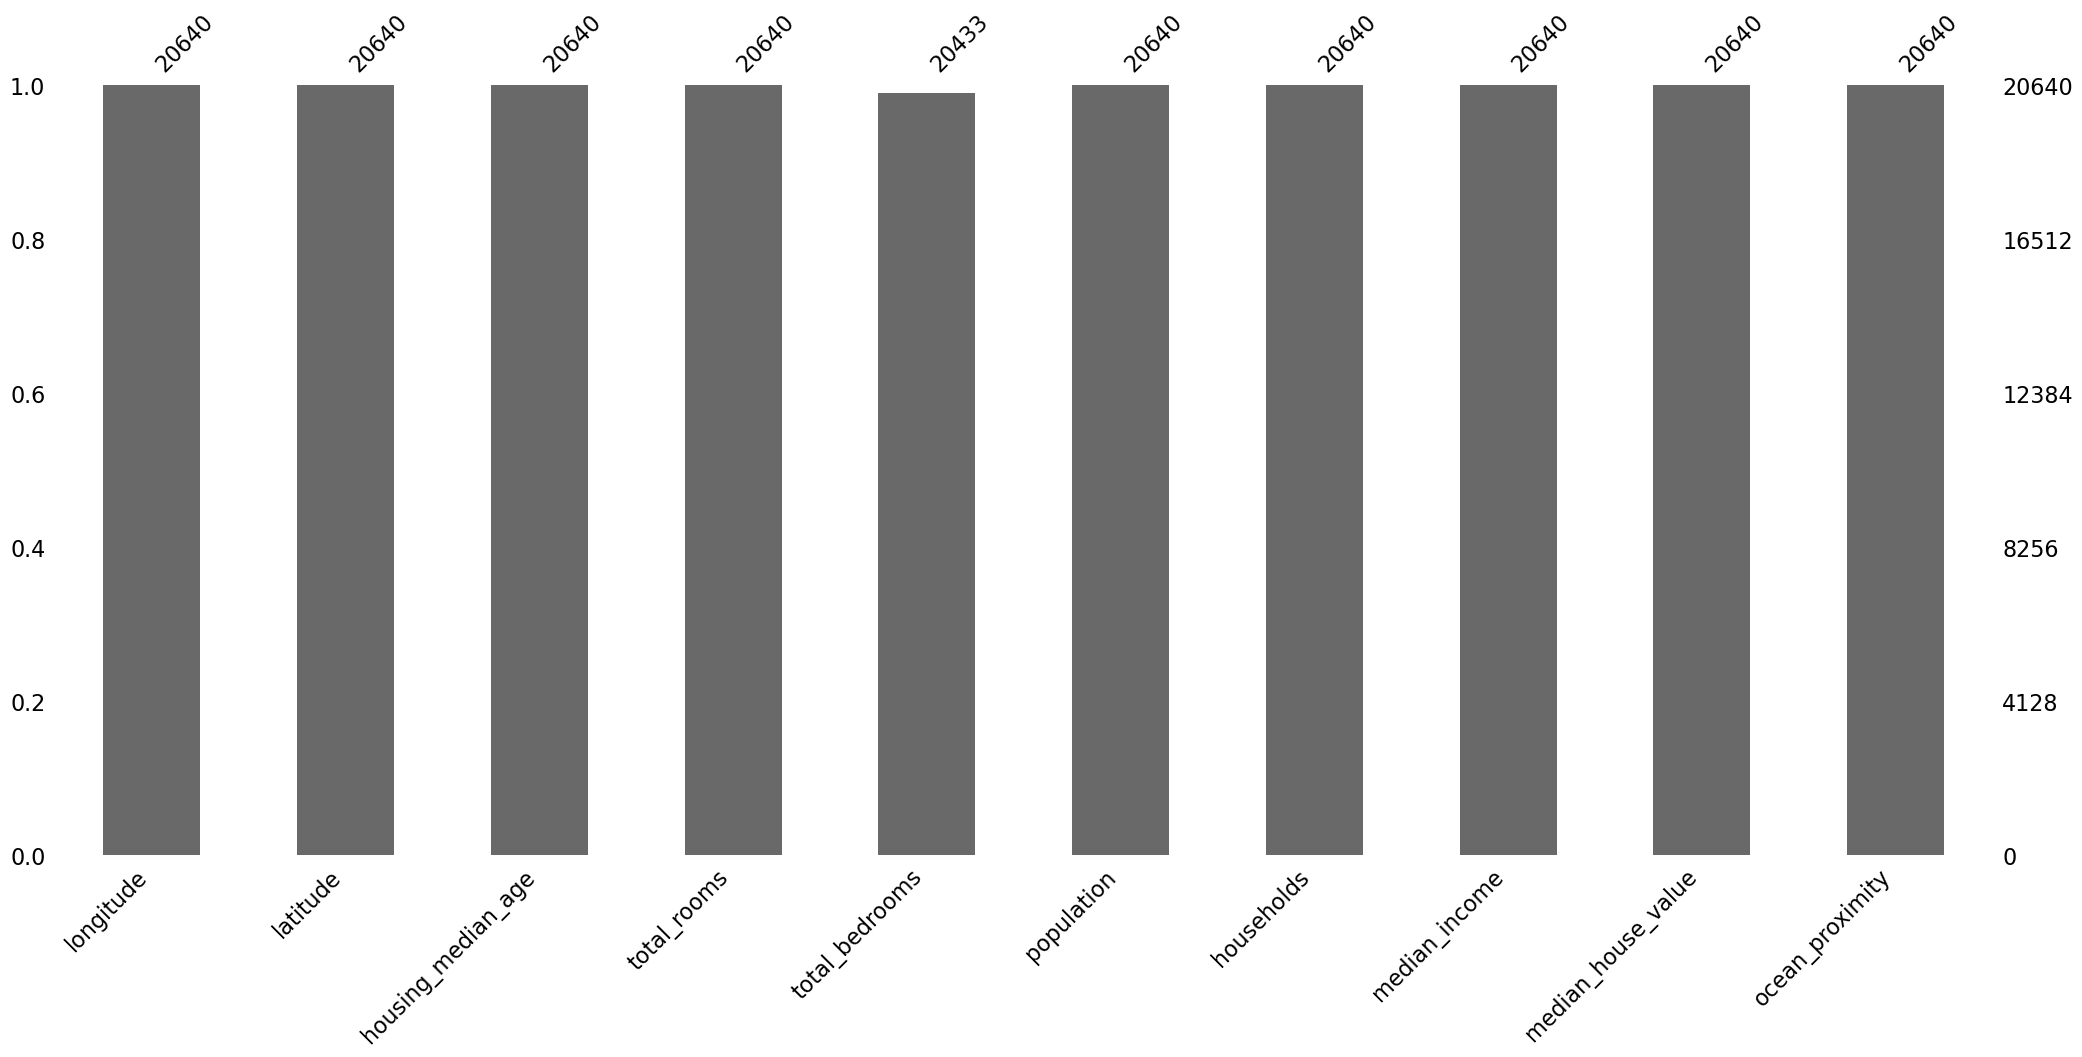

In [36]:
#Visualize missing values in 2 ways
#First Method
msno.bar(caHousing)

<Axes: >

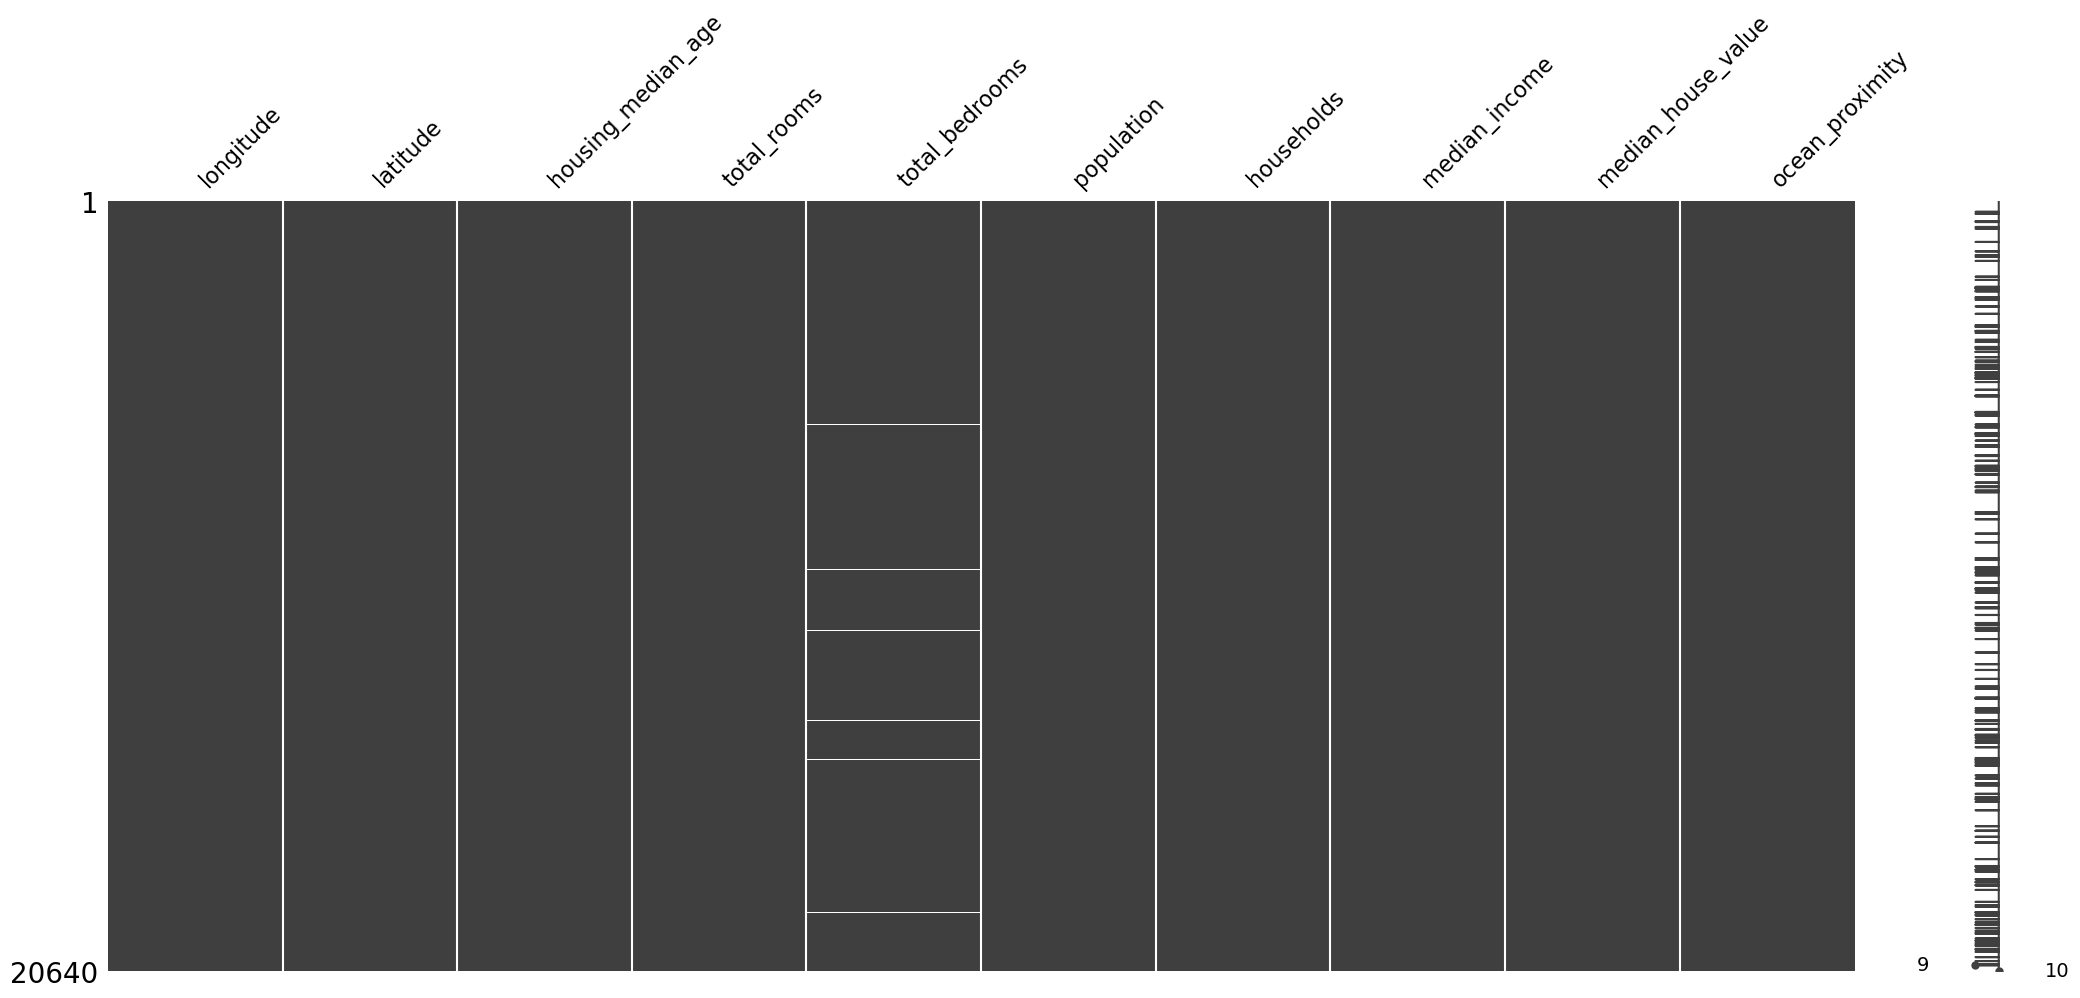

In [37]:
#Visualize missing values in 2 ways
#Second Method
msno.matrix(caHousing)

In [38]:
#Copying a dataframe
caHousing_copy=caHousing.copy()

(array([   5.,    7.,    9.,   15.,   65.,  140.,  291.,  345.,  401.,
         420.,  323.,  484.,  543.,  547.,  454.,  440.,  532.,  466.,
         430.,  450.,  594.,  512.,  514.,  601.,  676.,  489.,  489.,
         499.,  528.,  439.,  350.,  301.,  382.,  403.,  432.,  374.,
         334.,  336.,  279.,  259.,  259.,  287.,  307.,  222.,  209.,
         191.,  141.,  153.,  134.,  131.,  150.,  152.,  168.,  157.,
         143.,  204.,  114.,  122.,  103.,   96.,   85.,   70.,   81.,
          81.,   53.,   73.,   66.,   52.,   55.,   58.,   48.,   74.,
          44.,   34.,   27.,   39.,   27.,   34.,   24., 1014.]),
 array([ 14999.   ,  21061.525,  27124.05 ,  33186.575,  39249.1  ,
         45311.625,  51374.15 ,  57436.675,  63499.2  ,  69561.725,
         75624.25 ,  81686.775,  87749.3  ,  93811.825,  99874.35 ,
        105936.875, 111999.4  , 118061.925, 124124.45 , 130186.975,
        136249.5  , 142312.025, 148374.55 , 154437.075, 160499.6  ,
        166562.125, 172624

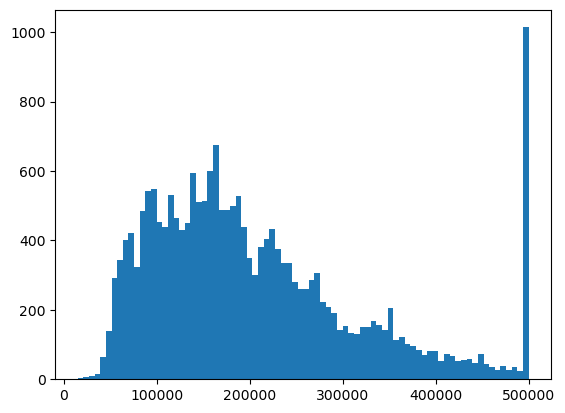

In [39]:
#To plot a histogram of one column in a dataframe
plt.hist(caHousing['median_house_value'],bins=80)

In [40]:
# Deleting a column in a dataframe
housingdfwithoutop = caHousing.drop(columns = 'ocean_proximity')


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

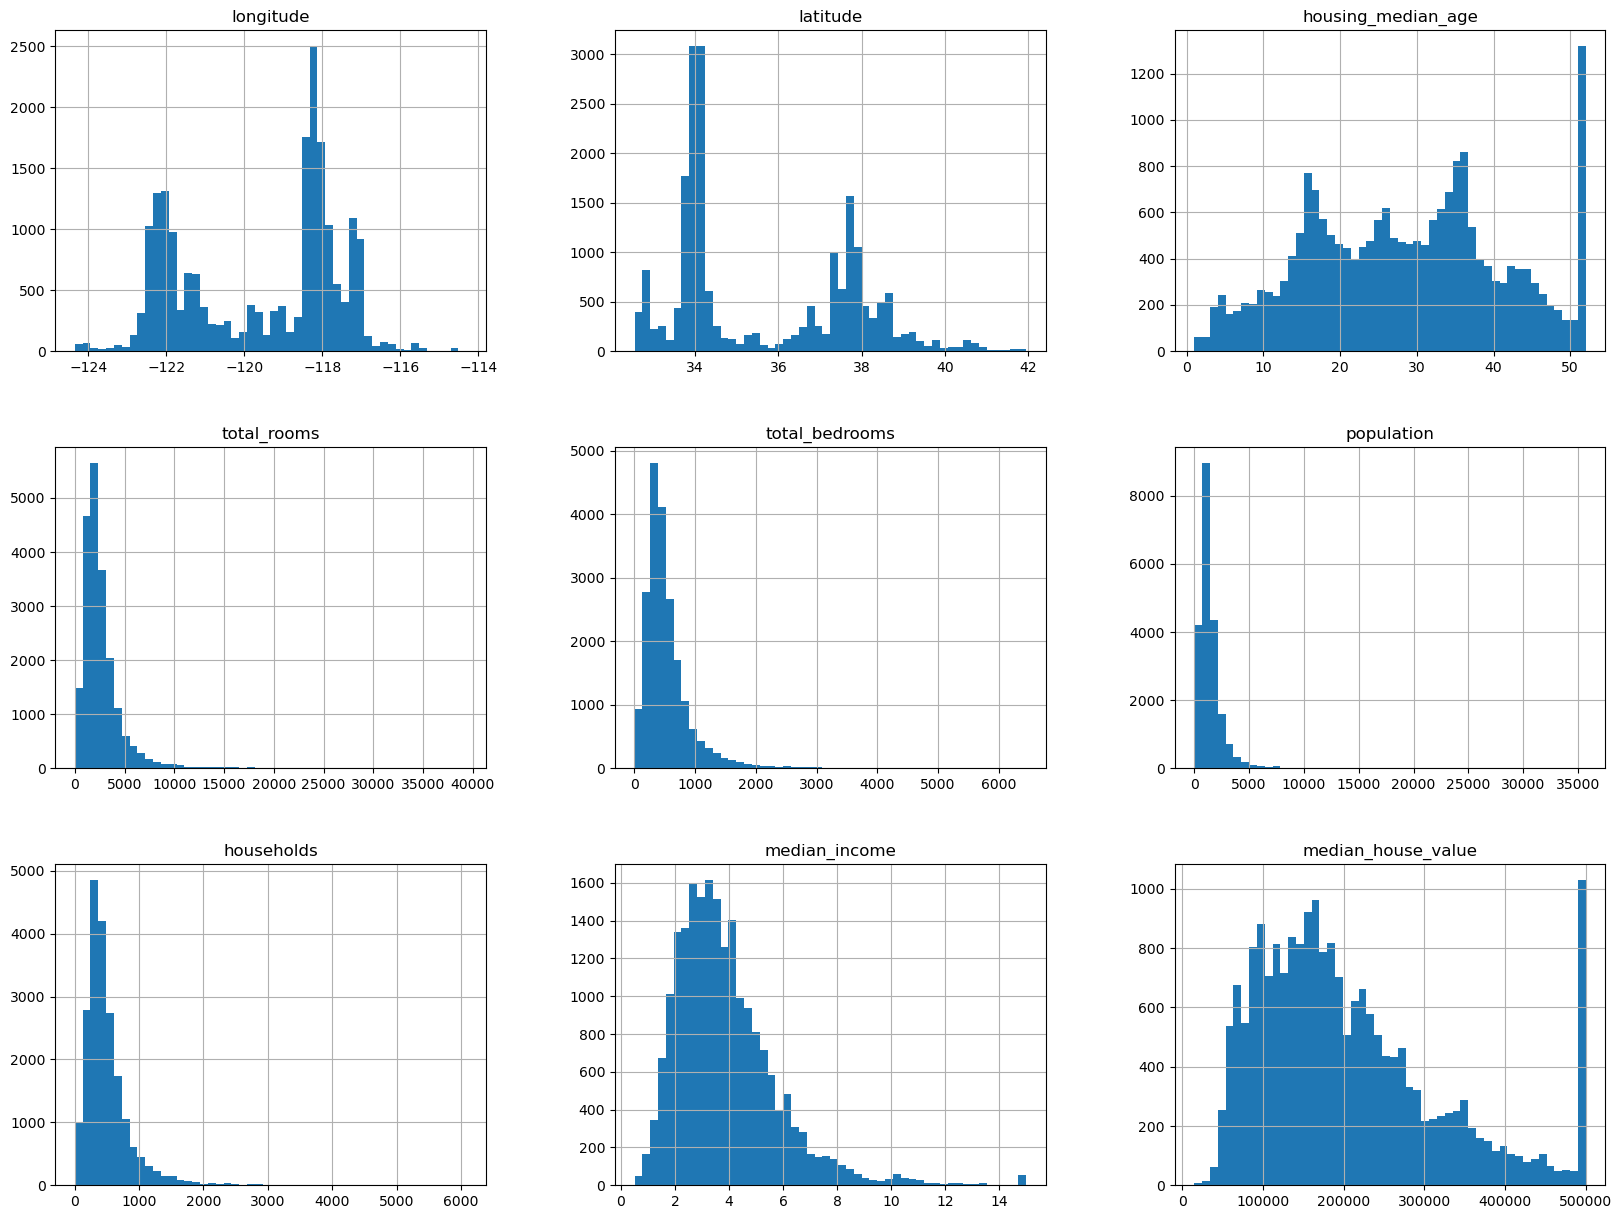

In [41]:
# Plot histograms of all numberic columns in a dataframe. Does not seem to work without bins and flgssize. If used on datafames with non-numeric columns, 
# plots histogram only with numeric columns
caHousing.hist(bins=50, figsize=(20,15))

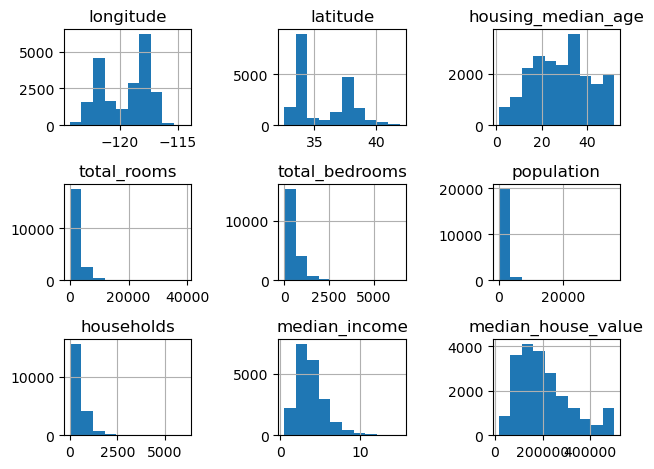

In [138]:
#To plot historam of all numeric columns in a dataframe use dataframe.hist() and use plt.tight_layout() to adjust subplots
#tight_layout adjusts the padding between and around subplots making it more readable.
caHousing.hist()
plt.tight_layout()

### Splitting a dataframe without the train_test_split function and using standard scaler


In [140]:
# The input file for this can be found in https://drive.google.com/file/d/1u3jX7LlK2Lid4ZgXZIDy1o4-R7ylfalh/view?usp=drive_link
insuranceDF = pd.read_csv('insurance2.csv')
print(insuranceDF.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


#### Finding out the class frequency

In [152]:
#finding out the class frequency
class_frequency_count=insuranceDF['insuranceclaim'].value_counts()
class_frequency_count

insuranceclaim
1    783
0    555
Name: count, dtype: int64

In [154]:
class_frequency_percent = (insuranceDF['insuranceclaim'].value_counts()*100)/insuranceDF['insuranceclaim'].count()
class_frequency_percent 

insuranceclaim
1    58.520179
0    41.479821
Name: count, dtype: float64

In [160]:
class_freq_df = pd.concat([class_frequency_count,class_frequency_percent], axis=1,keys=['class_frequency_count','class_frequency_percent'] )
class_freq_df

,class_frequency_count,class_frequency_percent
insuranceclaim,,
1,783,58.520179
0,555,41.479821


### Using standard scaler

In [56]:
#To find the mean of a dataframe
means = insuranceDF.mean()

In [58]:
means 

age                  39.207025
sex                   0.505232
bmi                  30.663397
children              1.094918
smoker                0.204783
region                1.515695
charges           13270.422265
insuranceclaim        0.585202
dtype: float64

In [60]:
#To find the standard deviation of a dataframe
stds = insuranceDF.std()

In [62]:
stds

age                  14.049960
sex                   0.500160
bmi                   6.098187
children              1.205493
smoker                0.403694
region                1.104885
charges           12110.011237
insuranceclaim        0.492871
dtype: float64

In [50]:
#zscore r standard score is the number of standard deviations by which the observed value is above or below the mean value
#z = (x - u) / s where z is the standard score, u is the mean and s is the standard deviation. There is an StandardScaler class in the sklearn library
#that will perform this calculation and calculate this score on a numpy array

In [ ]:
#Use standard scaler to fit and transform the entire dataframe and then split into test data and train data. Scaling should oly be done on the 
#independent variables, never on the dependent variables. After transformation, convert the the array back to dataframe.
#If you havent converted the dataframe into numpy array in the previous step, you can also use df.to_numpy() like trainData.to_numpy()

In [15]:
insurance_y =np.asarray(insuranceDF['insuranceclaim'])

In [29]:
insurance_X=np.asarray(insuranceDF.drop('insuranceclaim', axis=1))


In [33]:
from sklearn.preprocessing import StandardScaler
#standard scaler you always fit to the train data and then you use that to transform the entire dataset. After transformation, convert the 
#the array back to dataframe.
#If you havent converted the dataframe into numpy array in the previous step, you can also use df.to_numpy() like trainData.to_numpy()
#Found out later while doing k-means clustering that input to StandardScaler need not be a numpy array, it can be a dataframe, but output is going to be a 
#numpy array
std_scaler = StandardScaler().fit(insurance_X)
insurance_X_scaled = std_scaler.transform(insurance_X)
insurance_X_scaled = pd.DataFrame(insurance_X_scaled, columns=['age','sex','bmi','children','smoker','region','charges'])	

In [64]:
#The dataset consists the records of 1338 patients in total. Using 1000 records for training and 300 records for testing, 
#and the last 38 records to cross check your model.
dfTrain = insurance_X_scaled[:1000]
dfTest = insurance_X_scaled[1000:1300]
dfCheck = insurance_X_scaled[1300:] 

In [80]:
#Not sure if this is recommended
trainLabel = insurance_y[:1000]
testLabel = insurance_y[1000:1300]
checkLabel = insurance_y[1300:] 

### Using the min max scaler

In [ ]:
#MinMax Scaler shrinks the data within the given range, usually of 0 to 1.
#x_std = (x – x.min(axis=0)) / (x.max(axis=0) – x.min(axis=0))
#x_scaled = x_std * (max – min) + min
#min,max is the feature_range, by default 0 to 11
#x.min(axis=0) : Minimum feature value and x.max(axis=0):Maximum feature value


In [3]:
#This file is available in https://drive.google.com/file/d/1haWKpXJQE89Bj8h1oCI6pzRjvqFNpp-c/view?usp=drive_link
mydf=pd.read_csv('salary.csv')

In [47]:
#Scaling the age column using Python 
#x_std = (x – x.min(axis=0)) / (x.max(axis=0) – x.min(axis=0))
#x_scaled = x_std * (max – min) + min
x_scaled=[]
for i in range (len(x)):
    std = (x[i]-x.min())/(x.max()-x.min())
    scaled = std*(1-0)+0
    x_scaled.append(scaled)

In [49]:
x_scaled

[0.058823529411764705,
 0.17647058823529413,
 0.17647058823529413,
 0.11764705882352941,
 0.9411764705882353,
 0.7647058823529411,
 0.8823529411764706,
 0.7058823529411765,
 0.5882352941176471,
 0.5294117647058824,
 0.6470588235294118,
 0.0,
 0.058823529411764705,
 0.11764705882352941,
 0.17647058823529413,
 0.35294117647058826,
 0.8235294117647058,
 0.8823529411764706,
 1.0,
 0.7647058823529411,
 0.8823529411764706,
 0.7647058823529411]

In [59]:
#Scaling both age and salary column using MinMaxScaler from sklearn and comparing the results for age column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on both 'Age' and 'Salary' together
scaler.fit(mydf[['Age','Salary']])
# Transform 'Age' and 'Salary'
mydf[['Age', 'Salary']] = scaler.transform(mydf[['Age', 'Salary']])

In [61]:
mydf

,Name,Age,Salary
0,Amit,0.058824,0.213675
1,Mohit,0.176471,0.384615
2,Vidya,0.176471,0.136752
3,Nikita,0.117647,0.128205
4,Bhaskara,0.941176,0.897436
5,Nisha,0.764706,0.940171
6,Prerna,0.882353,0.982906
7,Sunny,0.705882,1.000000
8,Bhargab,0.588235,0.948718
9,Bhowmik,0.529412,0.726496


## Use imputation to handle missing data #

In [95]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
caHousing_temp = caHousing.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
def collist(df):
    mylist =[]
    for i in df.columns: 
        if df[i].dtype != 'object':
           mylist.append(i)
    return mylist

columns_list = collist(caHousing)

# extract columns that contain at least one missing value
new_column_list = [col for col in caHousing_temp.loc[:, caHousing_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
caHousing_temp = caHousing_temp[new_column_list]

###  Impute missing data using machine learning #

In [97]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(caHousing_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(caHousing_temp)

# convert the array values to a dataframe with the appropriate column names
caHousing_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [98]:
# confirm there are no columns with missing values
caHousing_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [99]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    caHousing[column_name] = caHousing_temp.replace(caHousing[column_name],caHousing[column_name])

# confirm columns no longer contain null data
caHousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Correlation ID and Heatmap

In [101]:
#Correlation Matrix Implementation in Python
#If there are non-numeric columns in the data frame use corrMatrix = df.corr(numeric_only=True). Otherwise correlation matrix will be generated 
#with non-numeric column but you will not be able to generate a heatmap from the correlation matrix.
data = {'a':[45,37,42,35,39],
        'b':[38,31,26,28,33],
        'c':[10,15,17,21,12]}
#Creating a dataframe from a dictionary
df=pd.DataFrame(data,columns=['a','b','c'])
#Creating a correlation matrix
corrMatrix = df.corr()

In [102]:
corrMatrix

,a,b,c
a,1.000000,0.518457,-0.701886
b,0.518457,1.000000,-0.860941
c,-0.701886,-0.860941,1.000000


<Axes: >

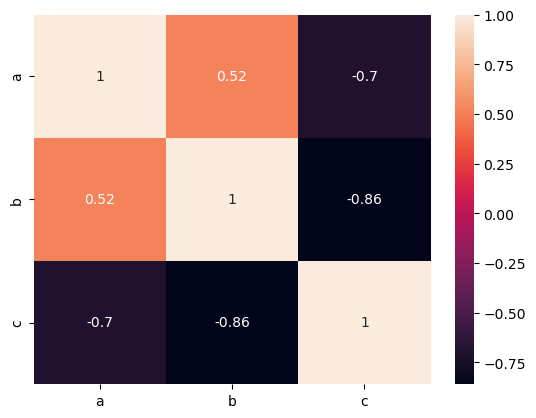

In [103]:
#Create a heatmap from the correlation matrix
sns.heatmap(corrMatrix,annot=True)

## Create a new column in a dataframe ##

In [105]:
caHousing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


## Removing highly correlated features #


In [107]:
#  a new feature that is a ratio of the total rooms to households
caHousing['rooms_per_household'] = caHousing['total_rooms']/caHousing['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
caHousing['bedrooms_per_room'] = caHousing['total_bedrooms']/caHousing['total_rooms']

# a new feature that is a ratio of the population to the households 
caHousing['population_per_household']= caHousing['population']/caHousing['households']

# let's combine the latitude and longitude into 1
caHousing['coords'] = caHousing['longitude']/caHousing['latitude']

caHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  int64  
 3   total_rooms               20640 non-null  int64  
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  int64  
 6   households                20640 non-null  int64  
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  int64  
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [108]:
# remove total_rooms, households, total bedrooms, popluation, longitude, latitude
caHousing = caHousing.drop(columns='total_rooms')  
caHousing = caHousing.drop(columns='households')
caHousing = caHousing.drop(columns='total_bedrooms')
caHousing = caHousing.drop(columns='population')
caHousing = caHousing.drop(columns='longitude')
caHousing = caHousing.drop(columns='latitude')

caHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  int64  
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  int64  
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB


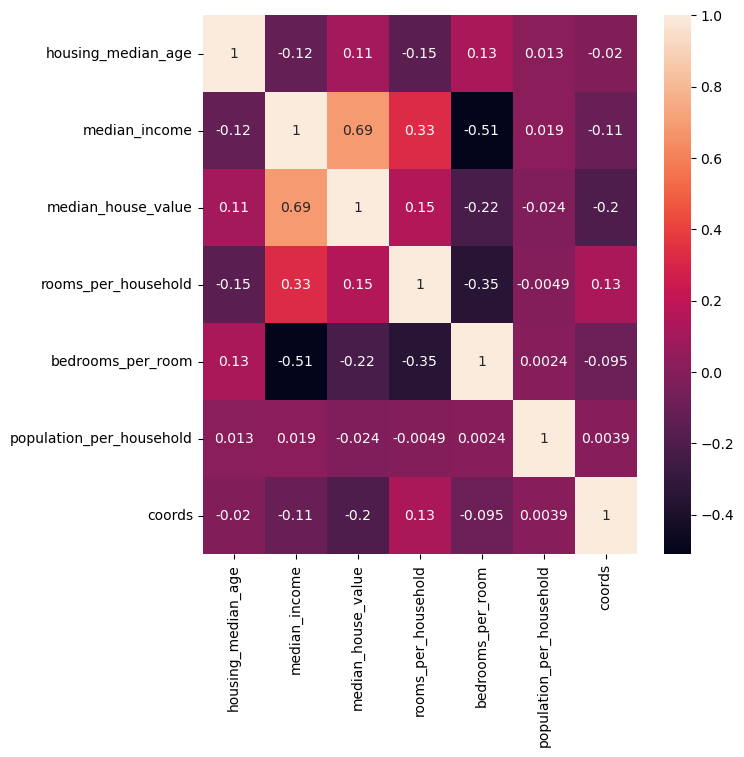

In [109]:
#heatmap after removing highly correlated features
corr = caHousing.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (7,7))

sns.heatmap(corr, annot=True)
plt.show()

## One Hot Encoding #

In [111]:
#pandas get_dummies function, takes in a column in a dataframe as the input and gives a dataframe as the output.# of columns in the dataframe is equal 
#to number of values in the column.Value of these columns would be true or false.
pd.get_dummies(caHousing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [112]:
#pandas get_dummies function directly applied to a dataframe. The original column name is prepended to the new column name along with the value
caHousing_encoded=pd.get_dummies(data=caHousing, columns=['ocean_proximity'])

In [113]:
caHousing_encoded

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,8.3252,452600,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21,8.3014,358500,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52,7.2574,352100,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52,5.6431,341300,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52,3.8462,342200,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1.5603,78100,5.045455,0.224625,2.560606,-3.067123,False,True,False,False,False
20636,18,2.5568,77100,6.114035,0.215208,3.122807,-3.069385,False,True,False,False,False
20637,17,1.7000,92300,5.205543,0.215173,2.325635,-3.074309,False,True,False,False,False
20638,18,1.8672,84700,5.329513,0.219892,2.123209,-3.076845,False,True,False,False,False


## Cleaning Column Names #

In [115]:
# write a function to remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
# each element in mindx is a string and string functions are used
#caHousing_encoded.columns outputs an object similar to a list containing all the column names.

def clncolnames(mindx):
    mylist =[]
    for i in caHousing_encoded.columns: 
#string functions used
        j=i.lower().replace(' ', '_').replace('<', '_')
        mylist.append(j)
    return mylist

caHousing_encoded.columns = clncolnames(caHousing_encoded.columns)

## Train the model #

In [117]:
caHousing_encoded.dtypes

housing_median_age              int64
median_income                 float64
median_house_value              int64
rooms_per_household           float64
bedrooms_per_room             float64
population_per_household      float64
coords                        float64
ocean_proximity__1h_ocean        bool
ocean_proximity_inland           bool
ocean_proximity_island           bool
ocean_proximity_near_bay         bool
ocean_proximity_near_ocean       bool
dtype: object

In [118]:
## Split target variable and feature variables. X here is a dataframe and y is a series
X = caHousing_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = caHousing_encoded['median_house_value']

In [119]:
type(X)

pandas.core.frame.DataFrame

In [120]:
X.dtypes

housing_median_age              int64
median_income                 float64
bedrooms_per_room             float64
population_per_household      float64
coords                        float64
ocean_proximity__1h_ocean        bool
ocean_proximity_inland           bool
ocean_proximity_island           bool
ocean_proximity_near_bay         bool
ocean_proximity_near_ocean       bool
dtype: object

In [121]:
type(y)

pandas.core.series.Series

In [122]:
y


0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

### Split training and test data #

In [184]:
import sklearn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%. Here we specify test_size. train_size also can be specified. If one of
# them is not specified then it will be taken as complementary of the other. If both are none, test_size is set to .25 by default
# X -> array with the inputs; y -> array of the outputs ; X and y should have the same length
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


## Linear Regression

### Linear Regression Model Training - Method 1 #

In [73]:
# Use scikit-learn’s LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a Linear regressor using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [75]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

In [77]:
y_pred_test

array([103743.0508965 ,  92451.25093188, 219490.96384448, ...,
       216609.96294968, 127975.07292308, 202803.25431034])

In [79]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700,103743.050896
3024,45800,92451.250932
15663,500001,219490.963844
20484,218600,283292.425471
9814,278000,244228.861575
...,...,...
17505,237500,210121.340663
13512,67300,74907.098235
10842,218400,216609.962950
16559,119400,127975.072923


In [133]:
# Determine accuracy uisng 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

In [129]:
r2_reg_model_test

0.56

In [157]:
r2_reg_model_train = round(reg_model.score(X_train, y_train),2)

In [159]:
r2_reg_model_train

0.61

In [163]:
#Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)

MAE: 53309.48142807734


In [87]:
print(reg_model.intercept_)
print(reg_model.coef_)

15374.894111075671
[   944.55690335  44621.952954   306144.36685085   -343.75263804
   9056.49410398 -25585.13870401 -88454.52044298 136030.47757433
 -13480.4999385   -8510.31848884]


### Linear Regression Model Training - Method 2 #

In [89]:
import statsmodels.api as sm


In [185]:
X_train

,housing_median_age,median_income,bedrooms_per_room,population_per_household,coords,ocean_proximity__1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
7061,35,4.1312,0.165833,2.985294,-3.478338,True,False,False,False,False
14689,20,2.8631,0.244617,2.014113,-3.570906,False,False,False,False,True
17323,24,4.2026,0.176140,2.564912,-3.473258,False,False,False,False,True
10056,14,3.1094,0.186420,2.188406,-3.082017,False,True,False,False,False
15750,52,3.3068,0.222083,2.298193,-3.241991,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
11284,35,6.3700,0.151128,3.032258,-3.492007,True,False,False,False,False
11964,33,3.0500,0.184825,3.904232,-3.451793,False,True,False,False,False
5390,36,2.9344,0.270823,3.332068,-3.478695,True,False,False,False,False
860,15,5.7192,0.166993,3.178891,-3.245343,True,False,False,False,False


In [91]:
#This adds a column of 1s to the dataframe. If this is ot done, then the model will not calculate an intercept. In SKlearn's LinearRegression, there 
#there is a similar parameter called fit_intercept for which the default value is true. If set as false the model will not calculate an intercept.

X_train2=sm.add_constant(X_train)

In [93]:
X_train2.head()

,const,housing_median_age,median_income,bedrooms_per_room,population_per_household,coords,ocean_proximity__1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
7061,1.0,35,4.1312,0.165833,2.985294,-3.478338,True,False,False,False,False
14689,1.0,20,2.8631,0.244617,2.014113,-3.570906,False,False,False,False,True
17323,1.0,24,4.2026,0.176140,2.564912,-3.473258,False,False,False,False,True
10056,1.0,14,3.1094,0.186420,2.188406,-3.082017,False,True,False,False,False
15750,1.0,52,3.3068,0.222083,2.298193,-3.241991,False,False,False,True,False


In [207]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       14448 non-null  float64
 1   housing_median_age          14448 non-null  int64  
 2   median_income               14448 non-null  float64
 3   bedrooms_per_room           14448 non-null  float64
 4   population_per_household    14448 non-null  float64
 5   coords                      14448 non-null  float64
 6   ocean_proximity__1h_ocean   14448 non-null  bool   
 7   ocean_proximity_inland      14448 non-null  bool   
 8   ocean_proximity_island      14448 non-null  bool   
 9   ocean_proximity_near_bay    14448 non-null  bool   
 10  ocean_proximity_near_ocean  14448 non-null  bool   
dtypes: bool(5), float64(5), int64(1)
memory usage: 860.7 KB


In [95]:
X_train3=X_train2.astype(float) 

In [97]:
#Added .astype(float) to remove the error "Pandas data cast to numpy dtype of object.Check input data with np.asarray(data)"
#.astype(float) when applied on a dataframe converts all columns to float data type. X_train2 had boolean true and false values to 1.0 and 0.0 
#respectively
est = sm.OLS(y_train, X_train3).fit()

In [99]:
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     2523.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:47:07   Log-Likelihood:            -1.8213e+05
No. Observations:               14448   AIC:                         3.643e+05
Df Residuals:                   14438   BIC:                         3.643e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [105]:
X_test2=sm.add_constant(X_test)

In [107]:
X_test2

,const,housing_median_age,median_income,bedrooms_per_room,population_per_household,coords,ocean_proximity__1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
20046,1.0,25,1.6812,0.357389,3.877437,-3.300333,False,True,False,False,False
3024,1.0,30,2.5313,0.182763,2.679795,-3.399545,False,True,False,False,False
15663,1.0,52,3.4801,0.140436,1.360332,-3.239153,False,False,False,True,False
20484,1.0,17,5.7376,0.176293,3.444444,-3.463244,True,False,False,False,False
9814,1.0,34,3.7250,0.228784,2.483645,-3.329601,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
17505,1.0,47,2.9545,0.243297,2.420833,-3.262848,True,False,False,False,False
13512,1.0,41,1.4891,0.245728,3.681481,-3.439461,False,True,False,False,False
10842,1.0,16,3.5120,0.285894,2.369565,-3.501931,True,False,False,False,False
16559,1.0,10,3.6500,0.192721,3.547519,-3.206769,False,True,False,False,False


In [109]:
X_test3=X_test2.astype(float)

In [111]:
X_test3

,const,housing_median_age,median_income,bedrooms_per_room,population_per_household,coords,ocean_proximity__1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
20046,1.0,25.0,1.6812,0.357389,3.877437,-3.300333,0.0,1.0,0.0,0.0,0.0
3024,1.0,30.0,2.5313,0.182763,2.679795,-3.399545,0.0,1.0,0.0,0.0,0.0
15663,1.0,52.0,3.4801,0.140436,1.360332,-3.239153,0.0,0.0,0.0,1.0,0.0
20484,1.0,17.0,5.7376,0.176293,3.444444,-3.463244,1.0,0.0,0.0,0.0,0.0
9814,1.0,34.0,3.7250,0.228784,2.483645,-3.329601,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17505,1.0,47.0,2.9545,0.243297,2.420833,-3.262848,1.0,0.0,0.0,0.0,0.0
13512,1.0,41.0,1.4891,0.245728,3.681481,-3.439461,0.0,1.0,0.0,0.0,0.0
10842,1.0,16.0,3.5120,0.285894,2.369565,-3.501931,1.0,0.0,0.0,0.0,0.0
16559,1.0,10.0,3.6500,0.192721,3.547519,-3.206769,0.0,1.0,0.0,0.0,0.0


In [115]:
y_pred_ols = est.predict(X_test3)

In [117]:
y_pred_ols

20046    103743.050896
3024      92451.250932
15663    219490.963844
20484    283292.425471
9814     244228.861575
             ...      
17505    210121.340663
13512     74907.098235
10842    216609.962950
16559    127975.072923
5786     202803.254310
Length: 6192, dtype: float64

In [125]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_comp_df = pd.DataFrame({'Actual':y_test,'Predicted_lm':y_pred_test, 'Predicted_smOLS':y_pred_ols})

pred_test_comp_df

,Actual,Predicted_lm,Predicted_smOLS
20046,47700,103743.050896,103743.050896
3024,45800,92451.250932,92451.250932
15663,500001,219490.963844,219490.963844
20484,218600,283292.425471,283292.425471
9814,278000,244228.861575,244228.861575
...,...,...,...
17505,237500,210121.340663,210121.340663
13512,67300,74907.098235,74907.098235
10842,218400,216609.962950,216609.962950
16559,119400,127975.072923,127975.072923


In [121]:
#Calculate mean absolte error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_ols)
print("MAE:", mae)

MAE: 53309.48142807738


### Linear regression: Comparing sklearn.LinearRegression and sm.OLS

In [161]:
#R2
#Using linear regression R3=0.56. Using sm.OLS R2=0.611.  
#MAE
#Using Linear regression = 53309.48142807734
#Using sm.OLS = 53309.48142807738
#Why is the R2 different? 
#My assumption was that itis because of the difference in datatypes of the columns in the training dataset as the sm.OLS was supplied with 
#all cloumns as flot values wheras the LinearRegression model had boolean columns in its input. However changing that did not make any difference.
#Found the solution. R2 value for sm.OLS is calculated using taining dataset whereas R2 value for Linear Regression is calculated using test dataset.
#Tried calculating R2 value using train dataset n Linear Regression and got the exact same results as sm.OLS

## RandomForestRegressor - Model Training

In [103]:
# try another machine learning algorithm : Randorm Forest
# Use scikit-learn’s Randorm Forest to train the model to both the training and evaluate it on the test sets
from sklearn.ensemble import RandomForestRegressor

# Create a  regressor using all the feature variables. n_estimators = The number of trees in the forest.
rf_model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

### Run the predictions

In [108]:
#run the predictions on the training and testing data
y_rf_pred_test = rf_model.predict(X_test)

### Evaluate the model

#compare the actual values (ie, target) with the values predicted by the model
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df

In [113]:
# Determine accuracy uisng 𝑅^2
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, y_rf_pred_test)

In [115]:
score

0.7499472455943947

### Determine feature importance

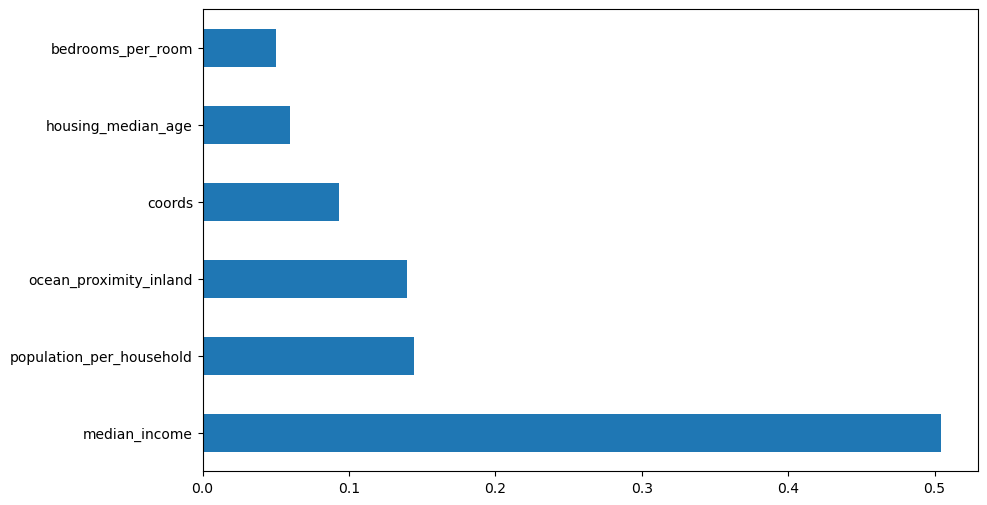

In [118]:
# Determine feature importance - random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data
# plot the 6 most important features 
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

In [154]:
# training data with 5 most important features. X_train and X_test are already existing dataframes. Specifying only the required columns creates another 
#dataframe with just the specified columns
train_x_if = X_train[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]
test_x_if = X_test[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]

# create an object of the RandfomForestRegressor Model
rf_model_if = RandomForestRegressor(n_estimators=10,random_state=10)

# fit the model with the training data
rf_model_if.fit(train_x_if, y_train)

# predict the target on the test data
predict_test_with_if = rf_model_if.predict(test_x_if)

In [160]:
# Determine accuracy uisng 𝑅^2

from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, predict_test_with_if)

In [162]:
score
#Since R2 hasnt changed much with low number of features, we can safely drop the unimportant features. This will give better explainability

0.7492676663549397

In [166]:
# Mean Squared Error on the train and test data
print('MSE on test data: ',  mean_squared_error(y_test, predict_test_with_if)**(0.5))

MSE on test data:  57366.910692045196


## Logistic Regression

In [ ]:
# The input file for this can be found in https://drive.google.com/file/d/1u3jX7LlK2Lid4ZgXZIDy1o4-R7ylfalh/view?usp=drive_link
#Perform cells 43 to 99 before this


In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(dfTrain, trainLabel)

LogisticRegression()

In [88]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(dfTest)
cm_lr = confusion_matrix(testLabel,y_pred)

print(cm_lr)

[[106  23]
 [ 19 152]]


In [94]:
scr = lr.score(dfTest, testLabel)
print("score = ", scr * 100, "%")

score =  86.0 %


In [92]:
from sklearn.metrics import precision_score
myprecision = precision_score(testLabel,y_pred)
print(myprecision)

0.8685714285714285


#### Visually plot feature importance 

In [122]:
#coef_ndarray of shape (1, n_features) or (n_classes, n_features).coef_ is of shape (1, n_features) when the given problem is binary
#My explanation: coef_ is a 2 dimensional array with 1 array having coefficient for all 7 features in an array  
print(lr.coef_)

[[ 0.37695424  0.03429887  1.63404861 -1.84002859  1.58792789 -0.05341334
   0.17953133]]


In [126]:
lr.coef_[0,0]

0.37695423679485823

In [100]:
lr.coef_.shape

(1, 7)

In [106]:
#Converted coef_ array to list.
coeff = list(lr.coef_[0])

In [108]:
coeff 

[0.37695423679485823,
 0.03429887148284574,
 1.6340486128922203,
 -1.8400285949404478,
 1.587927892570358,
 -0.05341333574683252,
 0.17953133232364354]

In [164]:
labels = list(dfTrain.columns)

In [166]:
#Create a dataframe with columns as 'Features' and 'importance'
feature_imp = pd.DataFrame()
feature_imp['Features'] = labels
feature_imp['importance'] = coeff

In [168]:
feature_imp

,Features,importance
0,age,0.376954
1,sex,0.034299
2,bmi,1.634049
3,children,-1.840029
4,smoker,1.587928
5,region,-0.053413
6,charges,0.179531


In [170]:
feature_imp.sort_values(by=['importance'], ascending=True, inplace=True)

In [172]:
feature_imp

,Features,importance
3,children,-1.840029
5,region,-0.053413
1,sex,0.034299
6,charges,0.179531
0,age,0.376954
4,smoker,1.587928
2,bmi,1.634049


In [174]:
feature_imp['positive'] = feature_imp['importance'] > 0

In [176]:
feature_imp

,Features,importance,positive
3,children,-1.840029,False
5,region,-0.053413,False
1,sex,0.034299,True
6,charges,0.179531,True
0,age,0.376954,True
4,smoker,1.587928,True
2,bmi,1.634049,True


In [178]:
print(feature_imp.to_string())

   Features  importance  positive
3  children   -1.840029     False
5    region   -0.053413     False
1       sex    0.034299      True
6   charges    0.179531      True
0       age    0.376954      True
4    smoker    1.587928      True
2       bmi    1.634049      True


In [180]:
#This removes the current index and sets features as the index
feature_imp.set_index('Features', inplace=True)

In [182]:
#features was a column before. It became an index now
feature_imp

,importance,positive
Features,,
children,-1.840029,False
region,-0.053413,False
sex,0.034299,True
charges,0.179531,True
age,0.376954,True
smoker,1.587928,True
bmi,1.634049,True


In [184]:
print(feature_imp.to_string())

          importance  positive
Features                      
children   -1.840029     False
region     -0.053413     False
sex         0.034299      True
charges     0.179531      True
age         0.376954      True
smoker      1.587928      True
bmi         1.634049      True


In [188]:
type(feature_imp)

pandas.core.frame.DataFrame

Text(0.5, 0, 'Importance')

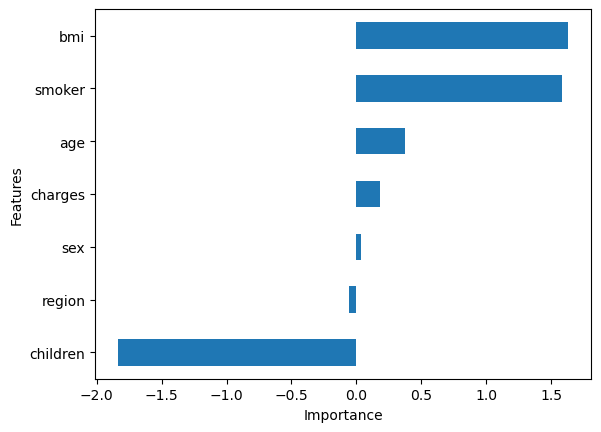

In [198]:
#basic barh plot with an added xlabel for importance
feature_imp.importance.plot(kind='barh')
plt.xlabel('Importance')

Text(0.5, 0, 'Importance')

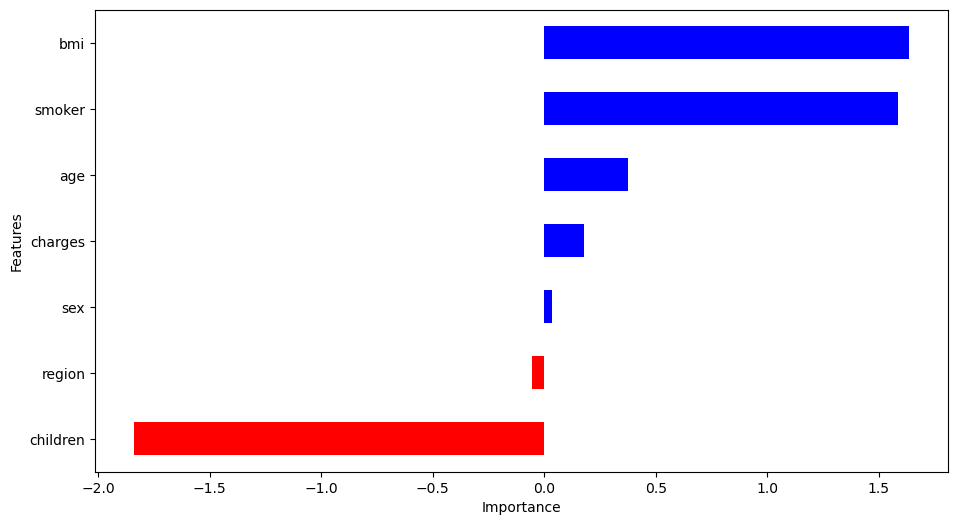

In [204]:
#formatted plot with blue colour for positive and red colour for negative correlation
feature_imp.importance.plot(kind='barh', figsize=(11, 6), color=feature_imp.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Decision Tree for Classification

In [135]:
#Dataset for this exercise is available in https://drive.google.com/file/d/1x76ft7K0u2Q7WgegPZHYMHbaBj-sTAXs/view?usp=drive_link
billdf=pd.read_csv("bill_authentication.csv")

In [8]:
billdf.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
billdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [14]:
billdf.shape

(1372, 5)

In [18]:
billdf.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [20]:
X=billdf.drop('Class',axis=1)

In [42]:
#y can also be created as y=billdf['Class'] in which case it will be a series instead of a dataframe. Neither makes any difference to the model accuracy
y=billdf[['Class']]

In [44]:
type(y)

pandas.core.frame.DataFrame

In [46]:
y.shape

(1372, 1)

In [80]:
# the final preprocessing step is to divide data into training and test sets
#random_state plays an important role in the train test split and this inturn can affect the acuracy of the model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)
# default test_size parameter value is 0.25

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029, 1)
(343, 1)


In [84]:
# Training the Algorithm. Here we would use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
myClassifier = DecisionTreeClassifier()
myClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
y_pred=myClassifier.predict(X_test)

In [88]:
y_pred.shape

(343,)

In [90]:
#Create a dataframe with columns as original columns in X-test, y_test and y_pred
compare_df = pd.DataFrame()
compare_df = X_test
compare_df['y_test']=y_test

In [92]:
compare_df['y_pred']=y_pred

In [94]:
compare_df

,Variance,Skewness,Curtosis,Entropy,y_test,y_pred
1058,-1.56210,-2.21210,4.25910,0.27972,1,1
714,2.55590,3.36050,2.03210,0.26809,0,0
1061,-2.31470,3.66680,-0.69690,-1.24740,1,1
399,2.96950,5.62220,0.27561,-1.15560,0,0
382,0.86202,2.69630,4.29080,0.54739,0,0
...,...,...,...,...,...,...
864,0.59823,3.50120,-3.97950,-1.78410,1,1
931,-0.49241,0.89392,-1.62830,-0.56854,1,1
1288,-2.65900,-1.60580,1.36470,0.16464,1,1
114,1.78190,6.91760,-1.27440,-1.57590,0,0


### Evaluating the model


In [ ]:
# Remember : for evaluating classification-based ML algorithm, use  
# confusion_matrix, classification_report and accuracy_score.

In [96]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred)

print(cm_lr)

[[197   1]
 [  3 142]]


In [102]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9883381924198251


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.99      0.98      0.99       145

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



### Visually plotting the tree

In [119]:
#.columns.values will give a numpy array to be passed as an argument in the plot_tree step
feat_names=compare_df.columns.values

[Text(0.5, 0.8333333333333334, 'Variance <= 0.32\ngini = 0.495\nsamples = 1029\nvalue = [564, 465]'),
 Text(0.25, 0.5, 'Skewness <= 5.865\ngini = 0.308\nsamples = 500\nvalue = [95, 405]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Curtosis <= -4.443\ngini = 0.201\nsamples = 529\nvalue = [469, 60]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

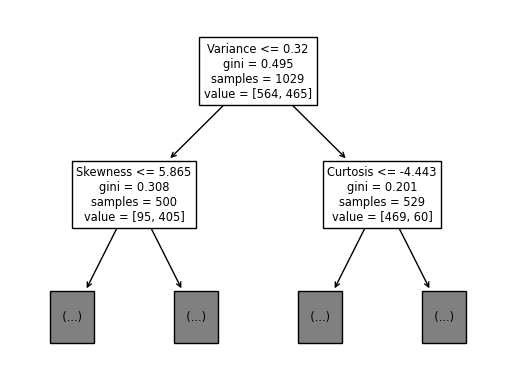

In [129]:
#To visually plot the decision tree. The tree can be plotted completely or can be printed in parts for better visibility
from sklearn import tree
tree.plot_tree(myClassifier,feature_names=feat_names,max_depth=1)

## Decision Tree for Regression

In [137]:
#Dataset for this exercise is available in https://drive.google.com/file/d/1JtAt_v9a-uM9Pzqmls_K4MIr0w3_kp3_/view?usp=drive_link
petroldf=pd.read_csv('petrol_consumption.csv')

In [139]:
petroldf.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [141]:
petroldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [143]:
petroldf.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [153]:
X=np.asarray(petroldf.drop('Petrol_Consumption',axis=1))

In [227]:
y=petroldf['Petrol_Consumption']

In [161]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() 
std_scaler_fitted = std_scaler.fit(X)
X_scaled = std_scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'])	

In [163]:
X_scaled_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,1.415441,-1.181841,-1.038921,-0.825903
1,1.415441,-0.263969,-1.249055,0.030364
2,1.415441,-0.663887,-1.151803,0.176112
3,-0.178923,1.106673,-0.930381,-0.753029
4,0.352532,0.276889,-1.486106,-0.479753


In [165]:
X_scaled_df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01
mean,3.747003e-16,5.181041e-16,-9.714451e-17,1.582068e-15
std,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00
min,-2.836197e+00,-2.076811e+00,-1.486106e+00,-2.174068e+00
25%,-7.103779e-01,-8.858672e-01,-7.106238e-01,-7.393655e-01
50%,-1.789231e-01,9.895169e-02,-2.402112e-01,-1.062743e-01
75%,4.853954e-01,5.935633e-01,4.603787e-01,4.539431e-01
max,2.478351e+00,1.938220e+00,3.535970e+00,2.799569e+00


In [229]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)
# default test_size parameter value is 0.25

In [231]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 4)
(10, 4)
(38,)
(10,)


In [233]:
from sklearn.tree import DecisionTreeRegressor
mydtreg = DecisionTreeRegressor()
mydtreg.fit(X_train,y_train)

DecisionTreeRegressor()

In [237]:
y_pred=mydtreg.predict(X_test)

In [239]:
#Create a dataframe with columns as original columns in X-test, y_test and y_pred
compare_df = pd.DataFrame()
compare_df['y_test']=y_test 
compare_df['y_pred']=y_pred


In [241]:
compare_df.info

<bound method DataFrame.info of     y_test  y_pred
40     587   525.0
32     577   574.0
21     540   457.0
42     632   610.0
19     640   782.0
10     580   464.0
24     460   410.0
31     554   571.0
20     649   525.0
39     968   782.0>

### Evaluating the model

In [250]:
from sklearn import metrics 
my_mae = metrics.mean_absolute_error(y_test,y_pred)

In [252]:
my_mae

80.5

In [258]:
my_mse = metrics.mean_squared_error(y_test,y_pred)

In [260]:
my_mse

9760.7

In [266]:
import math
my_rmse = math.sqrt(my_mse)

In [268]:
my_rmse

98.79625498975152

In [270]:
my_r2=metrics.r2_score(y_test, y_pred)

In [272]:
my_r2

0.40252598305278753

## Unsupervised Learning - Clustering

### Exploratory data analysis and data prep

In [3]:
# The input file is present in https://drive.google.com/file/d/1Od4XAUsyLMoOrZWszrFdAgcfxpzNpMaP/view?usp=drive_link

In [63]:
netflixdf=pd.read_csv('movies_data.csv')

In [5]:
netflixdf.head()

,userid,no_hrs,no_logins,device,type_of_content,no_of_distinct_ips,age,gender
0,5813,65.01,431,Mobile,TV Show,2,58,1
1,3126,72.41,4541,Web,Series,11,24,0
2,9533,93.80,193,Tablet,Series,1,46,0
3,9794,75.97,719,Tablet,TV Show,4,48,1
4,3030,25.17,990,Tablet,TV Show,1,42,1


In [65]:
#Always drop userid from datasets as it will be unuique, does not add any value and can skew model outputs
netflixdf.drop('userid', axis=1,inplace=True)

In [67]:
netflixdf.head()

,no_hrs,no_logins,device,type_of_content,no_of_distinct_ips,age,gender
0,65.01,431,Mobile,TV Show,2,58,1
1,72.41,4541,Web,Series,11,24,0
2,93.80,193,Tablet,Series,1,46,0
3,75.97,719,Tablet,TV Show,4,48,1
4,25.17,990,Tablet,TV Show,1,42,1


In [11]:
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   no_hrs              499 non-null    float64
 1   no_logins           499 non-null    int64  
 2   device              499 non-null    object 
 3   type_of_content     499 non-null    object 
 4   no_of_distinct_ips  499 non-null    int64  
 5   age                 499 non-null    int64  
 6   gender              499 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 27.4+ KB


In [9]:
netflixdf['device'].value_counts()

device
Tablet    135
Web       127
Mobile    124
TV        113
Name: count, dtype: int64

In [10]:
netflixdf['type_of_content'].value_counts()

type_of_content
Series     197
TV Show    193
Movie      109
Name: count, dtype: int64

In [13]:
#Applying one-hot encoding for columns with type 'object'
data = pd.get_dummies(netflixdf, columns=['device','type_of_content'])

In [69]:
data.head()

,no_hrs,no_logins,no_of_distinct_ips,age,gender,device_Mobile,device_TV,device_Tablet,device_Web,type_of_content_Movie,type_of_content_Series,type_of_content_TV Show
0,65.01,431,2,58,1,True,False,False,False,False,False,True
1,72.41,4541,11,24,0,False,False,False,True,False,True,False
2,93.80,193,1,46,0,False,False,True,False,False,True,False
3,75.97,719,4,48,1,False,False,True,False,False,False,True
4,25.17,990,1,42,1,False,False,True,False,False,False,True


In [71]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() 
std_scaler_fitted = std_scaler.fit(data)
data_scaled = std_scaler.transform(data)


In [73]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

In [75]:
data_scaled_df.head()

,no_hrs,no_logins,no_of_distinct_ips,age,gender,device_Mobile,device_TV,device_Tablet,device_Web,type_of_content_Movie,type_of_content_Series,type_of_content_TV Show
0,0.470560,-0.596785,-0.640192,1.328723,1.002006,1.739021,-0.54106,-0.608998,-0.584293,-0.528665,-0.807662,1.259163
1,0.724951,2.707904,1.026533,-1.476193,-0.997998,-0.575036,-0.54106,-0.608998,1.711471,-0.528665,1.238142,-0.794178
2,1.460279,-0.788152,-0.825383,0.338752,-0.997998,-0.575036,-0.54106,1.642040,-0.584293,-0.528665,1.238142,-0.794178
3,0.847334,-0.365216,-0.269808,0.503747,1.002006,-0.575036,-0.54106,1.642040,-0.584293,-0.528665,-0.807662,1.259163
4,-0.899027,-0.147316,-0.825383,0.008762,1.002006,-0.575036,-0.54106,1.642040,-0.584293,-0.528665,-0.807662,1.259163


In [77]:
data_scaled_df.describe()
#When I used standard scaler all the one hot encoded columns got scaled too. Based on internet research, this is acceptable as in this situation, 
#some columns do require scaling. So for consistency the whole dataset including the one hot encoded columns can be scaled

,no_hrs,no_logins,no_of_distinct_ips,age,gender,device_Mobile,device_TV,device_Tablet,device_Web,type_of_content_Movie,type_of_content_Series,type_of_content_TV Show
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,1.566327e-16,4.271800e-17,1.423933e-17,1.762118e-16,8.543600e-17,-1.067950e-16,1.601925e-17,1.174745e-16,4.983767e-17,1.601925e-17,-4.983767e-17,-5.695733e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-1.755362e+00,-8.629295e-01,-8.253832e-01,-1.971178e+00,-9.979980e-01,-5.750362e-01,-5.410602e-01,-6.089985e-01,-5.842926e-01,-5.286655e-01,-8.076620e-01,-7.941782e-01
25%,-8.919794e-01,-5.983936e-01,-6.401916e-01,-9.812080e-01,-9.979980e-01,-5.750362e-01,-5.410602e-01,-6.089985e-01,-5.842926e-01,-5.286655e-01,-8.076620e-01,-7.941782e-01
50%,-1.312671e-02,-3.861215e-01,-4.549999e-01,1.737573e-01,-9.979980e-01,-5.750362e-01,-5.410602e-01,-6.089985e-01,-5.842926e-01,-5.286655e-01,-8.076620e-01,-7.941782e-01
75%,8.946028e-01,-1.171632e-01,4.709583e-01,8.337375e-01,1.002006e+00,-5.750362e-01,-5.410602e-01,1.642040e+00,1.711471e+00,-5.286655e-01,1.238142e+00,1.259163e+00
max,1.671012e+00,3.047218e+00,2.693258e+00,1.493718e+00,1.002006e+00,1.739021e+00,1.848223e+00,1.642040e+00,1.711471e+00,1.891555e+00,1.238142e+00,1.259163e+00


### Running k-means clustering with random k

In [33]:
#n_clusters = number of clusters to be determined by the elbow method
#init='KMeans++' speeds up convergence. The algorithm implemented is 'greedy k-Means++'. Centroids are selected using sampling based on an empirical probability 
#distribution of the points’ contribution to the overall inertia. Passing 'random' instead may result in the model giving different results for run as the
#initial centroids are selected at random. However if you use random_state = int, then randomness is repeatable.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8,init='k-means++')
km.fit(data_scaled)

KMeans()

### Determining the number of clusters using elbow method

In [110]:
SSE = []
for cluster in range(1,12):
    km = KMeans(n_clusters = cluster, init='k-means++',max_iter=300)
    km.fit(data_scaled)
    SSE.append(km.inertia_)

In [112]:
frame = pd.DataFrame({'Cluster':range(1,12), 'SSE':SSE})

In [95]:
frame

,Cluster,SSE
0,1,5988.000000
1,2,3981.815785
2,3,3067.165997
3,4,2497.657371
4,5,2240.025219
5,6,1959.938313
6,7,1750.193018
7,8,1567.739684
8,9,1326.454524
9,10,1267.995824


Text(0, 0.5, 'Inertia')

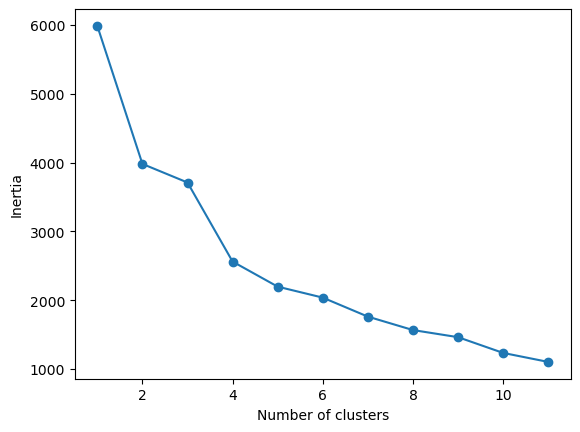

In [114]:
#Plot a graph with one column of the dataframe in x-axis and another cloumn in y-axis.To find the elbow point graph is plotted with # of clusters
#in the x-axis and inertia in the y-axis
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Running k-means with k determined after applying elbow method

In [118]:
km = KMeans(n_clusters=4,init='k-means++',max_iter=300)
km.fit(data_scaled)

KMeans(n_clusters=4)

In [120]:
km.inertia_

2562.0835497195603

In [122]:
#Why do I get different inertia for the same number of clusters between different runs even though I have used k-means++ and max_iter the same?

### Analysis post clustering

#### Adding clusters to the original dataframe

In [124]:
clusters=km.predict(data_scaled)

In [138]:
data['clusters']=clusters

In [140]:
data.head()

,no_hrs,no_logins,no_of_distinct_ips,age,gender,device_Mobile,device_TV,device_Tablet,device_Web,type_of_content_Movie,type_of_content_Series,type_of_content_TV Show,clusters
0,65.01,431,2,58,1,True,False,False,False,False,False,True,0
1,72.41,4541,11,24,0,False,False,False,True,False,True,False,2
2,93.80,193,1,46,0,False,False,True,False,False,True,False,3
3,75.97,719,4,48,1,False,False,True,False,False,False,True,1
4,25.17,990,1,42,1,False,False,True,False,False,False,True,1


#### Grouping the data by clusters and applying statistical formula

In [188]:
# data.groupby(by=['clusters'])[data.columns].median()     &   data.groupby('clusters')[data.columns].median()   also give the same result
data.groupby('clusters').median()

,no_hrs,no_logins,no_of_distinct_ips,age,gender,device_Mobile,device_TV,device_Tablet,device_Web,type_of_content_Movie,type_of_content_Series,type_of_content_TV Show
clusters,,,,,,,,,,,,
0,48.59,569.0,3.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53.39,491.0,3.0,48.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,48.48,3002.0,14.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,54.99,528.0,2.0,47.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
